In [2]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt    
from matplotlib.patches import Rectangle
from astropy.wcs import WCS                 
from astropy import units as u  
import pylab
import numpy as np
from spectral_cube import SpectralCube     
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


# Rectangular region

## Plotting Continuum with sub region

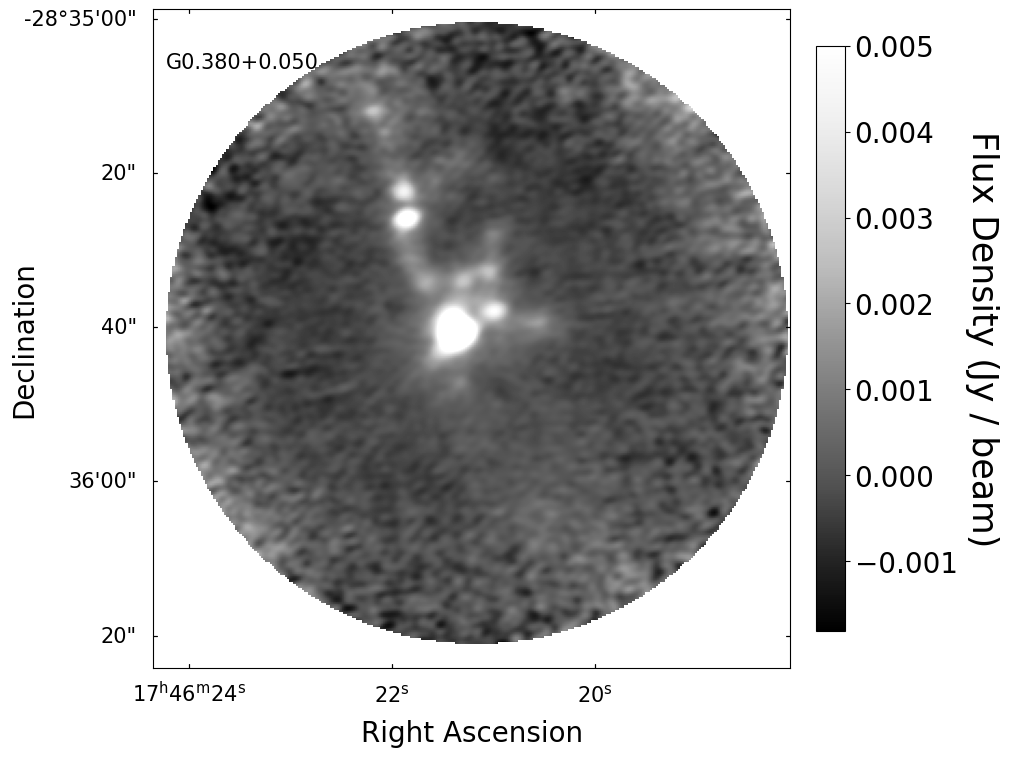

In [4]:
path ="B.Dust_Ridge_sci.spw25_27_29_31.cont.I.tt0.pbcor.fits"
image=fits.getdata(path)
header=fits.getheader(path)
w1=WCS(header)
w1 = w1.dropaxis(3)
w1 = w1.dropaxis(2)

image_2D = pylab.squeeze(image)


#init plot and axes
fig1 = plt.figure(1,figsize=(10,10),constrained_layout=True)       
ax1 = plt.subplot(projection=w1)            
RA = ax1.coords[0]
Dec = ax1.coords[1]



#shows image
#plt.plot(np.array([100,100]),np.array([200,300]),color="red",linewidth=3)
im1 = plt.imshow(image_2D,cmap='Greys_r',vmax=0.005)
#print(np.shape(image_2D))
#plots the subcube patch
#plt.gca().add_patch(Rectangle((166-5,175-5),10,10,edgecolor='red',alpha=0.9,facecolor='none',lw=2,label="Subcube")) 
#formats plot
#from matplotlib_scalebar.scalebar import ScaleBar
RA.set_ticks(size=-3)                      
Dec.set_ticks(size=-3)
ax1.tick_params(axis='both', which='major', pad=15)
plt.xlabel('Right Ascension',fontsize=20,labelpad=1)
plt.ylabel('Declination',fontsize=20,labelpad=0) 
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.annotate('G0.380+0.050',fontsize=15,xy=(0.02,0.91),xycoords="axes fraction")
plt.xlim(25,320)
plt.ylim(20,325)
cb=plt.colorbar(im1,fraction=0.046,pad=0.04) 
cb.set_label(label='Flux Density (Jy / beam)',fontsize=25,rotation=270,labelpad=30) 
cb.ax.tick_params(which = 'major', labelsize = 20) 


pylab.savefig("continuum.pdf",dpi=250,pad_inches=1)



## Redoing the spectrum

<SkyCoord (ICRS): (ra, dec) in deg
    (266.58818356, -28.59536026)>
(array(144.), array(136.5882353))


Text(0, 0.5, 'Temp Brightness (K)')

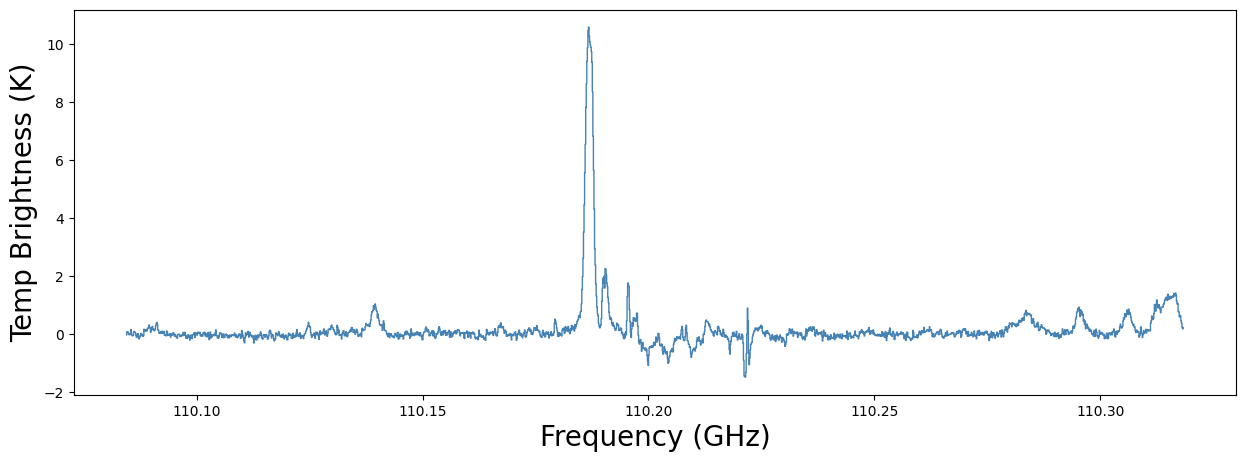

In [6]:
#reads in file
path="A.Dust_Ridge_13C16O.cube.I.pbcor.fits"
#makes figure
fig1=pylab.figure(1,figsize=(15,5))

#finds the pixel positions for the RA and dec
#find RA DEC of x,y,z
core_coords=w1.pixel_to_world(175,166)
print(core_coords)

#find the corresponding pixel positions for those coords in new image
header=fits.getheader(path)
w2=WCS(header)
image_coords=core_coords.to_pixel(w2,0,mode="wcs")
print(image_coords)

#plots spectrum
sc=SpectralCube.read(path)
sc.allow_huge_operations=True 
sc_Ghz=sc.with_spectral_unit(u.GHz)
sc_Ghz=sc_Ghz.to(u.K)
freq,Dec,Ra = sc_Ghz.world[:,0,0] 
subcube=sc_Ghz.hdu.data[:,int(image_coords[0])-5:int(image_coords[0])+5,int(image_coords[1])-5:int(image_coords[1])+5]
spectrum = np.average(subcube,axis=(1,2)) 
ax1=pylab.subplot()
ax1.plot(freq,spectrum,lw=1,drawstyle='steps-mid',color="SteelBlue")
pylab.xlabel("Frequency (GHz)", fontsize=20)
    
pylab.ylabel('Temp Brightness (K)',fontsize=20)



# Circular region

## Plotting Continuum with sub region

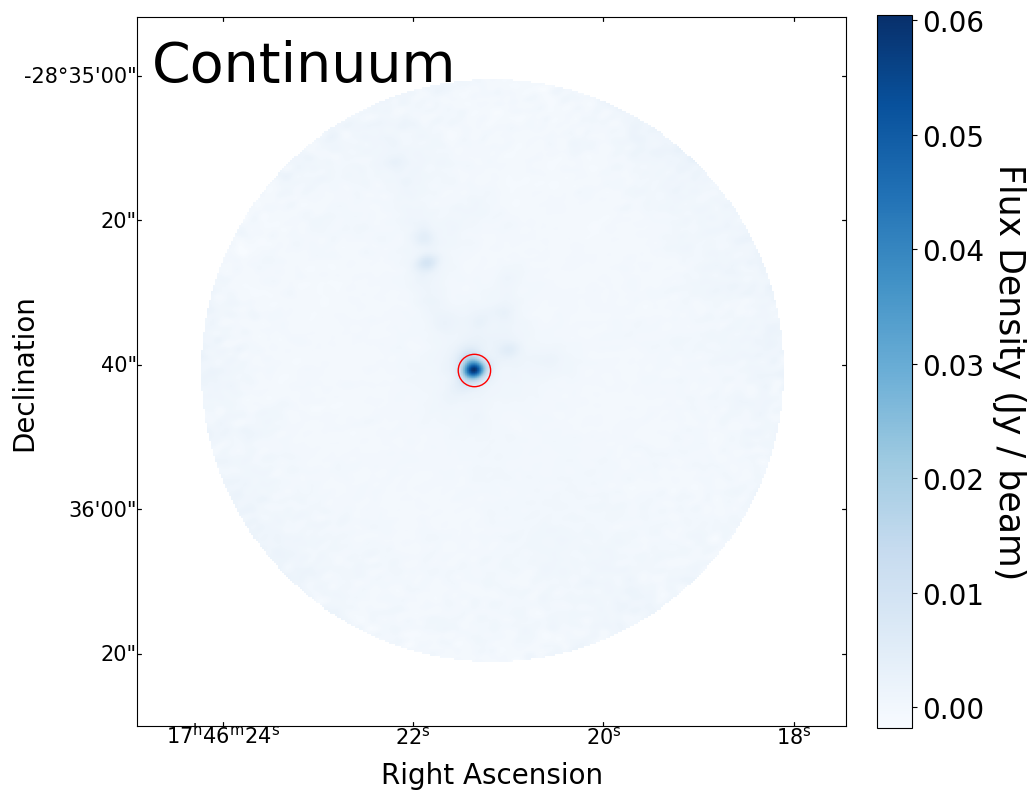

In [38]:
path ="B.Dust_Ridge_sci.spw25_27_29_31.cont.I.tt0.pbcor.fits"
image=fits.getdata(path)
header=fits.getheader(path)
w1=WCS(header)
w1 = w1.dropaxis(3)
w1 = w1.dropaxis(2)
image_2D = pylab.squeeze(image)


#init plot and axes
fig1 = plt.figure(1,figsize=(10,10))       
ax1 = plt.subplot(projection=w1)            
RA = ax1.coords[0]
Dec = ax1.coords[1]



#shows image
im1 = plt.imshow(image_2D,cmap='Blues')
#plots the subcube patch
circle1 = plt.Circle((166, 175), 8, color='r',fill=False)
plt.gca().add_patch(circle1)
#formats plot
RA.set_ticks(size=-3)                      
Dec.set_ticks(size=-3)                     
plt.xlabel('Right Ascension',fontsize=20,labelpad=1)
plt.ylabel('Declination',fontsize=20,labelpad=0) 
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.annotate('Continuum',fontsize=40,xy=(0.02,0.91),xycoords="axes fraction") 
cb=plt.colorbar(im1,fraction=0.046,pad=0.04) 
cb.set_label(label='Flux Density (Jy / beam)',fontsize=25,rotation=270,labelpad=30) 
cb.ax.tick_params(which = 'major', labelsize = 20) 



## Redoing Spectrum